<a href="https://colab.research.google.com/github/avantika10roy/CodeClauseInternship_PredictingHousePrices/blob/main/House_Price_Prediction_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Import Dataset

In [82]:
house= pd.read_csv("/content/sample_data/housing.csv")

Dataset Description

In [83]:
print(house.shape) #Prints number of rows and columns

(20640, 9)


In [84]:
house.head() #prints first 5 rows of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [85]:
house.columns.values #displays the column names

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [86]:
house.info() #information on each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20637 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20429 non-null  float64
 5   population          20628 non-null  float64
 6   households          20630 non-null  float64
 7   median_income       20631 non-null  float64
 8   median_house_value  20632 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [87]:
print(house.dtypes) #datatype of each column

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [88]:
house #displays the dataset for first 5 and last 5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [89]:
house.describe() #description based on mean, standard deviation, min&max, percentage

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20637.000000,20635.000000,20429.000000,20628.000000,20630.000000,20631.000000,20632.000000
mean,-119.569704,35.631861,28.639046,2635.499443,537.869352,1425.440760,499.607465,3.870831,206870.509936
std,2.003532,2.135952,12.585640,2181.039708,421.384250,1132.601922,382.356098,1.900014,115402.351214
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.500000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534900,179700.000000
75%,-118.010000,37.710000,37.000000,3147.500000,647.000000,1725.000000,605.000000,4.743400,264825.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Preprocessing


In [90]:
house.drop_duplicates(inplace = True) #drop duplicates

In [91]:
house.dropna(inplace = True) #drop null values

In [92]:
z = np.abs(stats.zscore(house))
print(z)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       1.327580  1.051802            0.982077     0.803669        0.970641   
1       1.322588  1.042441            0.605903     2.041395        1.348669   
2       1.332571  1.037760            1.855465     0.535129        0.825832   
3       1.337563  1.037760            1.855465     0.623422        0.719006   
4       1.337563  1.037760            1.855465     0.461932        0.612181   
...          ...       ...                 ...          ...             ...   
20635   0.758506  1.800728            0.288307     0.444548        0.389033   
20636   0.818409  1.805408            0.844099     0.887388        0.920789   
20637   0.823401  1.777324            0.923498     0.175092        0.125529   
20638   0.873319  1.777324            0.844099     0.355339        0.305946   
20639   0.833384  1.749239            1.002897     0.067829        0.185453   

       population  households  median_income  media

In [93]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Exploratory Data Analysis

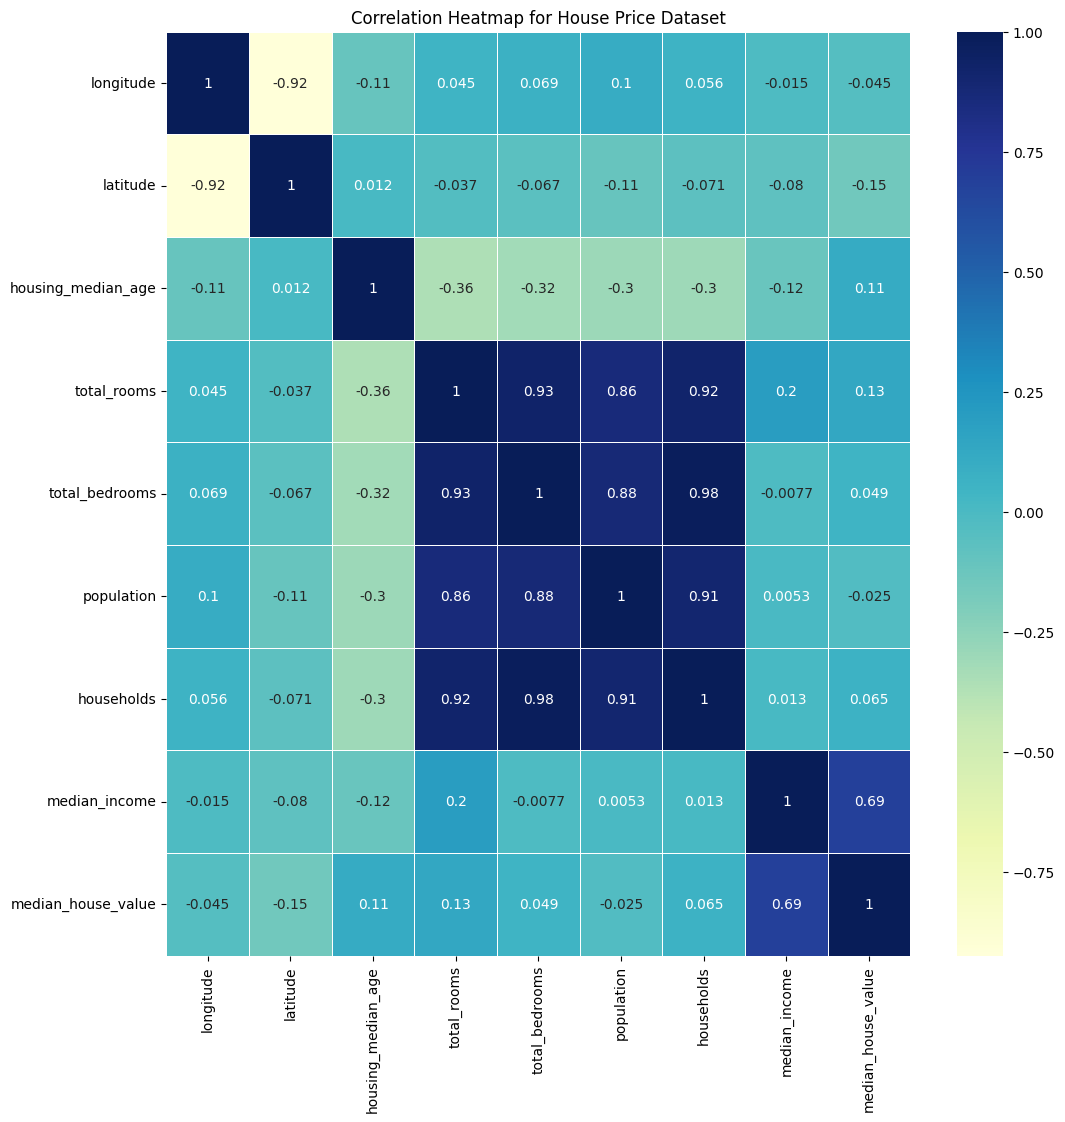

In [95]:
#heatmap of dataset
correlation_matrix=house.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot= True, cmap="YlGnBu",linewidths=0.5)
plt.title("Correlation Heatmap for House Price Dataset")
plt.show()

0.9782023629533974

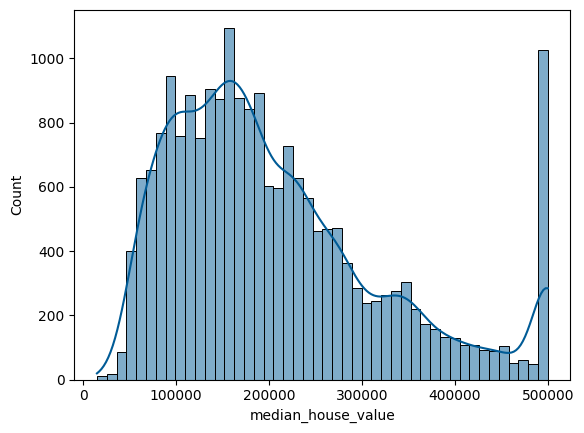

In [97]:
#histplot of data
sns.histplot(house['median_house_value'], color = '#005b96', kde= True);
house['median_house_value'].skew()

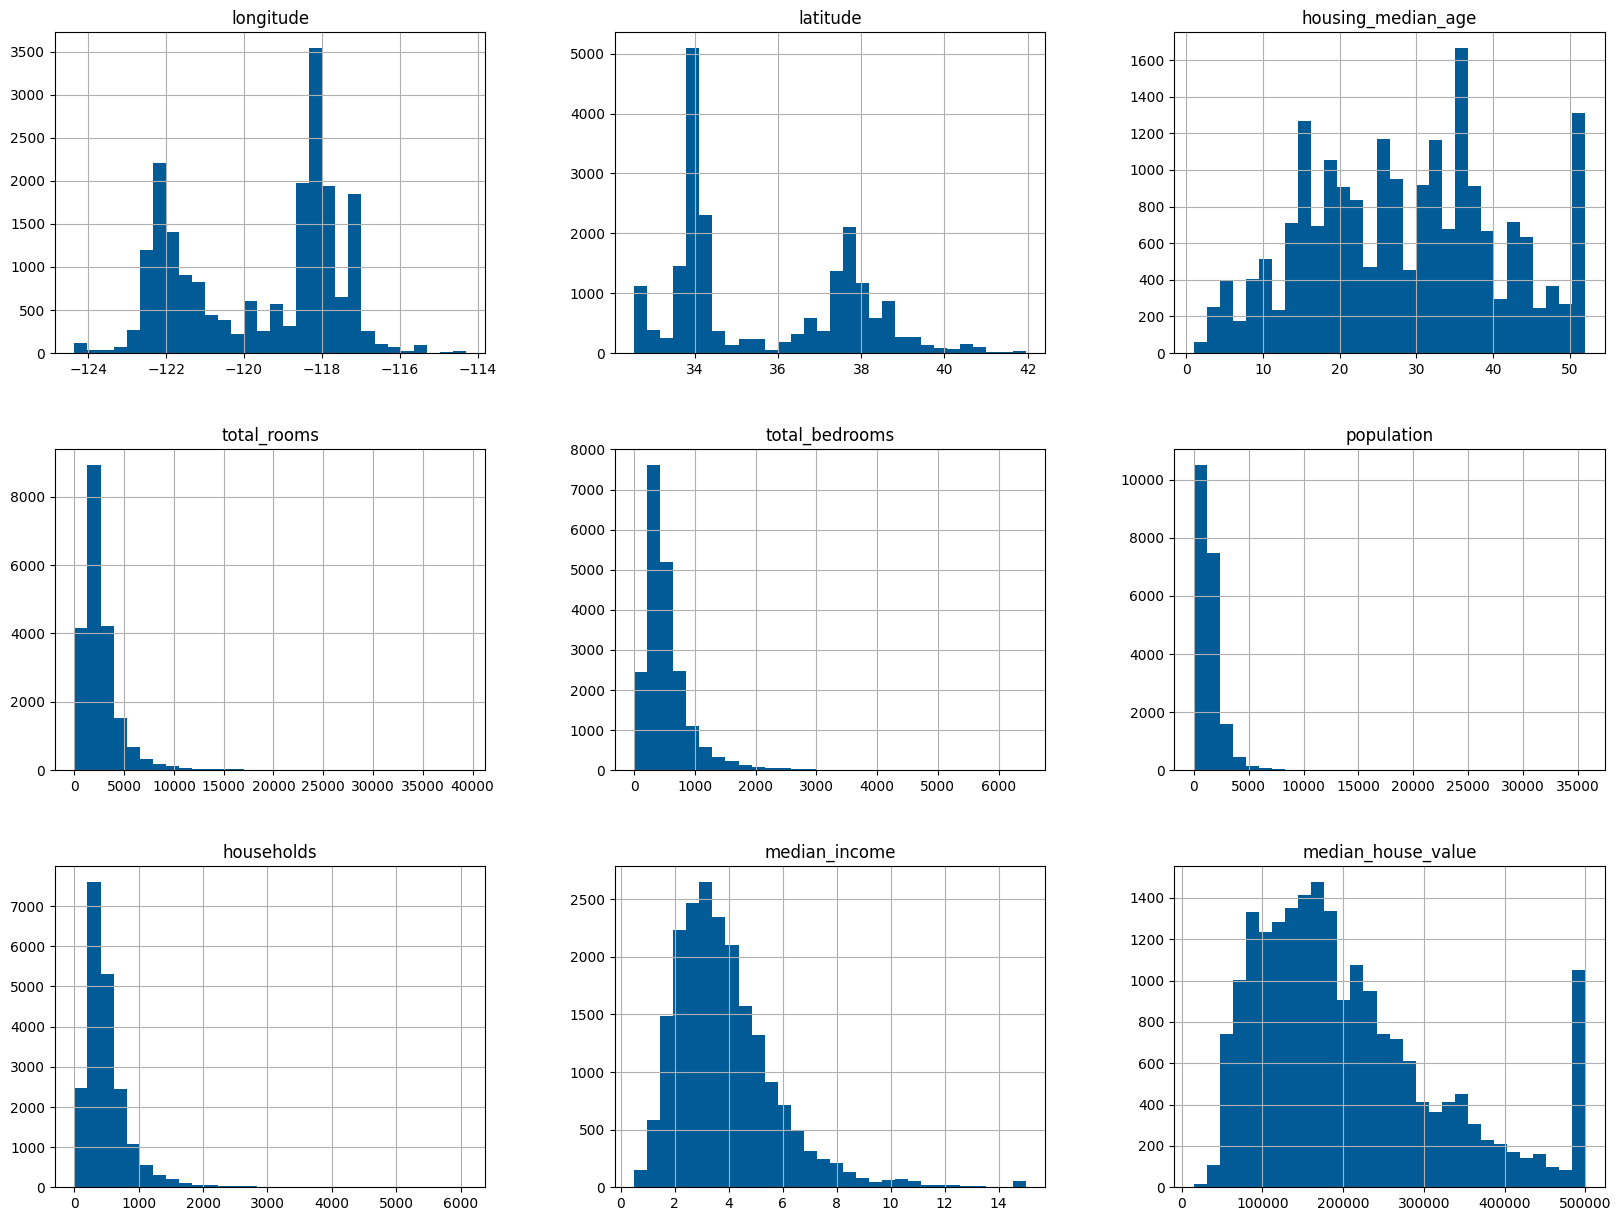

In [98]:
house.hist(bins = 30, figsize=(20, 15), color = '#005b96'); #histplot of individual features

Train Test Split

In [99]:
#Extract features and target variables
X = house.drop('median_house_value', axis=1)
y = np.log(house['median_house_value'])

In [100]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [101]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

Model Training

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.25676209350357393
MSE: 0.11684497721753208
RMSE: 0.3418259457933702
R2: 0.6500225771105366


In [105]:
# User input
input_values = []
for feature in X.columns:
    value = float(input(f"Enter value for {feature}: "))
    input_values.append(value)

# Preprocess user input
input_df = pd.DataFrame([input_values], columns=X.columns)
input_scaled = scaler.transform(input_df)

# Make prediction
predicted_log_median_house_value = model.predict(input_scaled)

# Inverse transform predicted value
predicted_median_house_value = np.exp(predicted_log_median_house_value)

# Output prediction
print("Predicted Median House Value:", predicted_median_house_value[0])

Enter value for longitude: -114.5
Enter value for latitude: 34.3
Enter value for housing_median_age: 20
Enter value for total_rooms: 6000
Enter value for total_bedrooms: 1500
Enter value for population: 1000
Enter value for households: 500
Enter value for median_income: 2.0
Predicted Median House Value: 68553.77542930677


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
